<a href="https://colab.research.google.com/github/ParthKhiriya/Sentiment_Analysis_PRML_Project/blob/main/Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Obtaining the Dataset**

In [1]:
# Installing the kaggle library
! pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Fetching the API to download the dataset
! kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset
License(s): CC0-1.0


In [4]:
from zipfile import ZipFile
dataset = '/content/sentiment-analysis-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# Importing all the required libraries and dependencies
import numpy as np
import pandas as pd

In [6]:
# Loading the main dataset and also the train and test set
train_given = pd.read_csv('train.csv', encoding='latin-1')
test_given = pd.read_csv('test.csv', encoding='latin-1')
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header= None)
df = df.drop(labels=0)
df.columns = ["polarity","id","date","query","user","text"]

# This gives the information about our data,  like what are the datatypes of content present in all the columns and also the null count
print(df)
# Our data has no null values and no duplicates

<ipython-input-6-14a3abb87616>:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header= None)


        polarity          id                          date     query  \
1              0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2              0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3              0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5              0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1048568        4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048569        4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048570        4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048571        4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048572        4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

                    user                                               text  
1          scotthamilton  is upset that he can't update h

# **Step 2 : Data Preprocessing**

In [7]:
df['polarity'].value_counts()

# Since value_counts() is showing two different types of 0s so we have to check what is the problem
print(df['polarity'].unique())

['0' 0 4]


In [8]:
# As the output of unique() function shows that the polarity columns contains two types of 0, integer and string respectively
# Now we have to convert the string zero to integer zero, so we will use to_numeric function
df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce').fillna(0).astype(int)

df['polarity'] = df['polarity'].astype(str).str.strip().astype(int)

In [9]:
# Now let us again check if our data has two types of zeroes or not
print(df['polarity'].unique())

[0 4]


In [10]:
# Again checking for the number of positive and negative tweets, this time we get the actual value
df['polarity'].value_counts()
df['polarity'] = df['polarity'].map({4:1,0:0})
df['polarity'].value_counts()

,count
polarity,
0,799996
1,248576


In [11]:
# Now importing some more required dependencies
# The re library is for handling regular expressions, like handling links, URLs etc
import re
import string
# The nltk library is for handling the natural language processing tasks such as tokenisation, stemming, removing stopwords etc.
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')

# This function performs basic tasks for cleaning the data such as lowercasing, URL handling etc.
def clean_text(text):

    text = text.lower()  # Lowercasing
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text.strip()

# Save the cleaned text in our dataframe
df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenisation - splits the dataset into an array of words(nltk generally performs word tokenisation i.e. seperating words) for better handling of punctuations
df['tokens'] = df['cleaned_text'].apply(lambda x: x.split())

# Removing all the stopwords because it will not impact the sentiment of the tweet
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Then stemming(converting a word into its root word e.g. acting, actor to act)
stemmer = PorterStemmer()
df['stemmed_text'] = df['tokens'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

print(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


         polarity          id                          date     query  \
1               0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2               0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3               0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4               0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5               0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...           ...         ...                           ...       ...   
1048568         1  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048569         1  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048570         1  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048571         1  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048572         1  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

                    user                                               text  \
1          scotthamilton  is upset that he c

# **Step 3 : Exploratory Data Analysis**

<ipython-input-12-bad918de8143>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_eda['polarity'], palette="viridis")


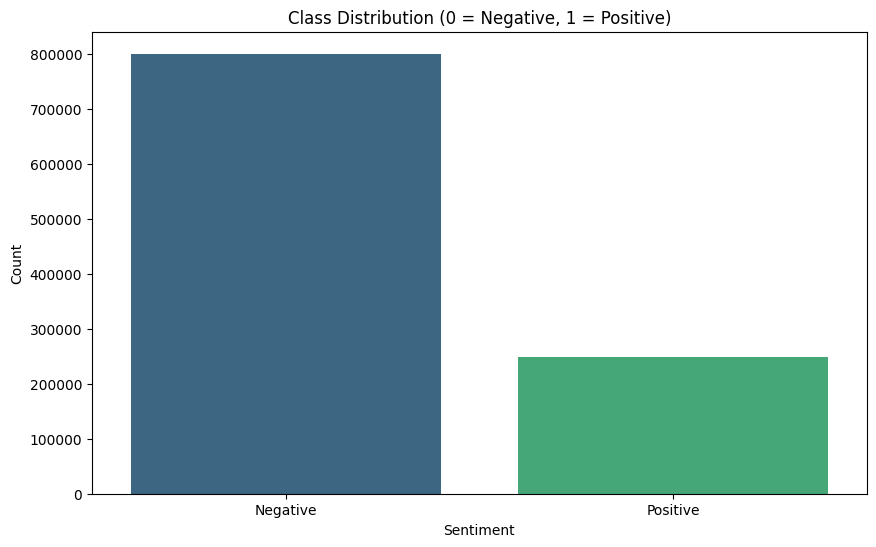

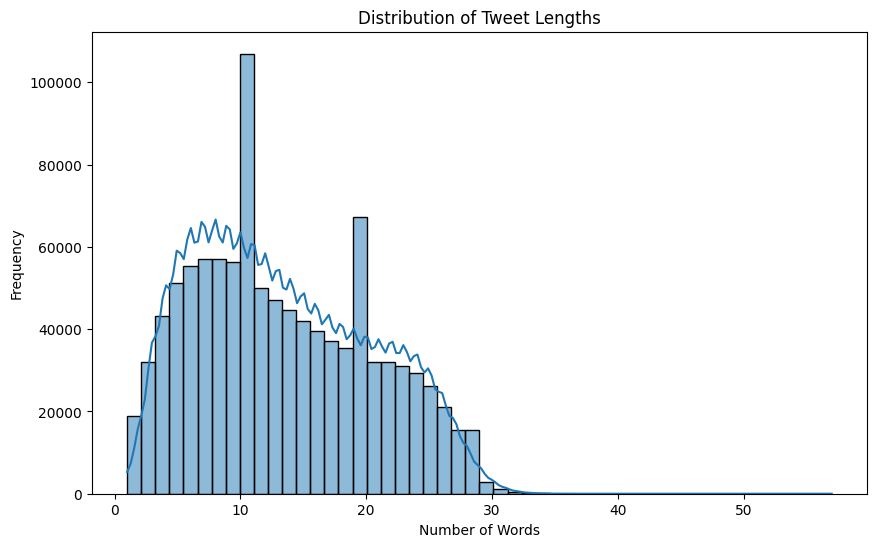

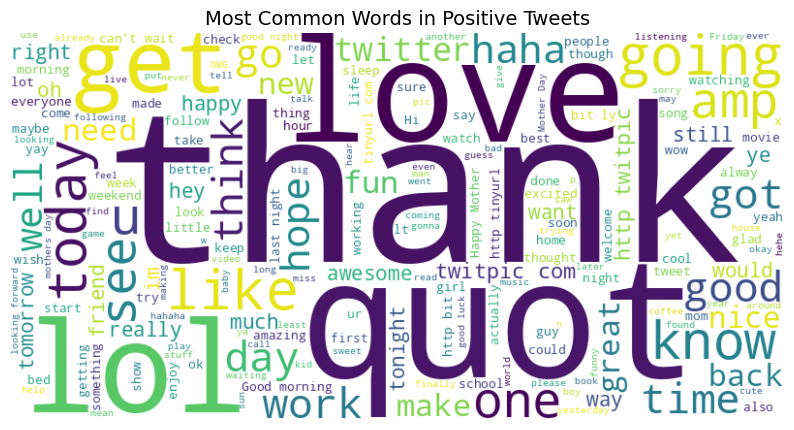

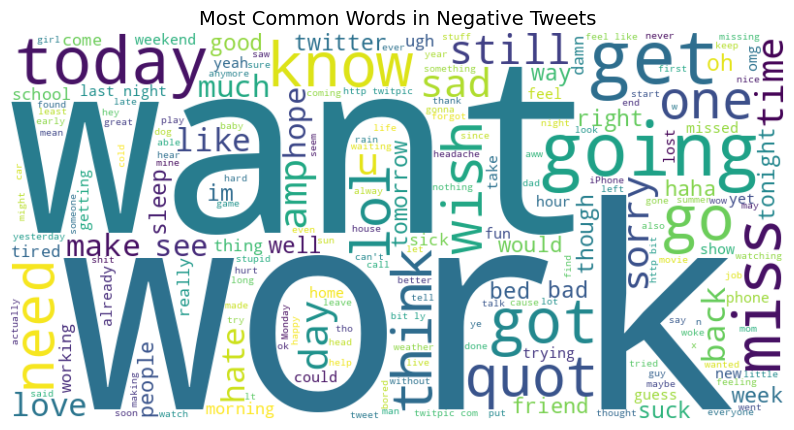

<ipython-input-12-bad918de8143>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


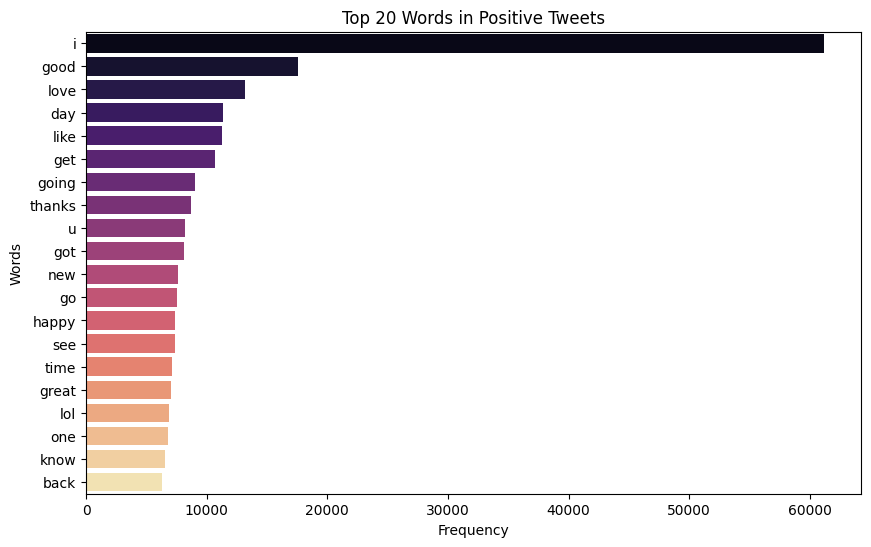

<ipython-input-12-bad918de8143>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


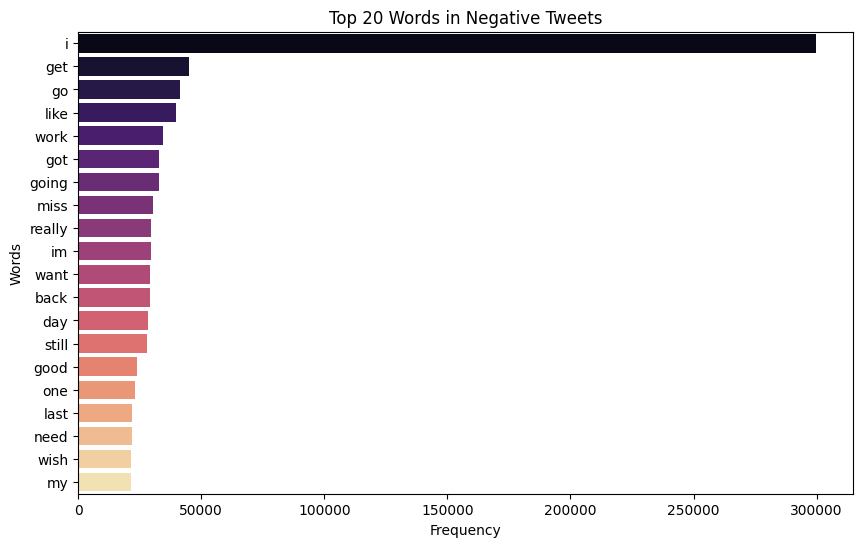

<ipython-input-12-bad918de8143>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


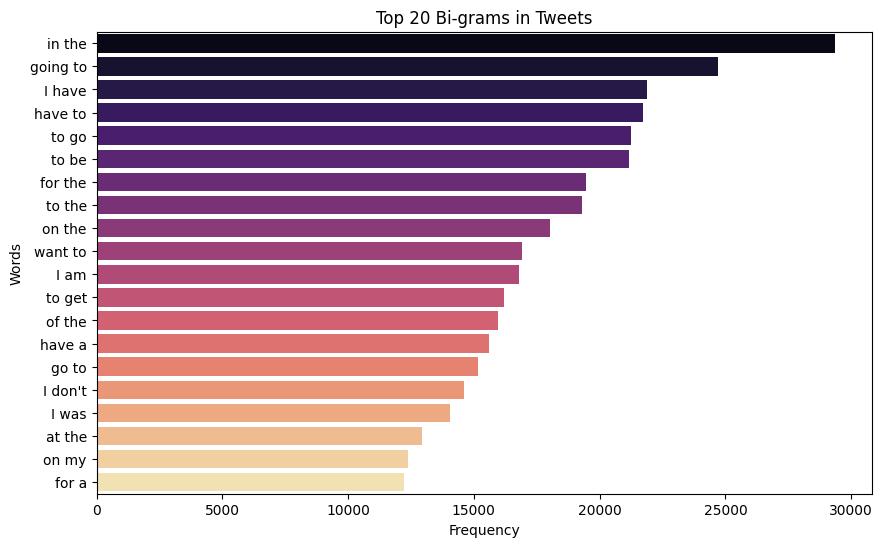

<ipython-input-12-bad918de8143>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


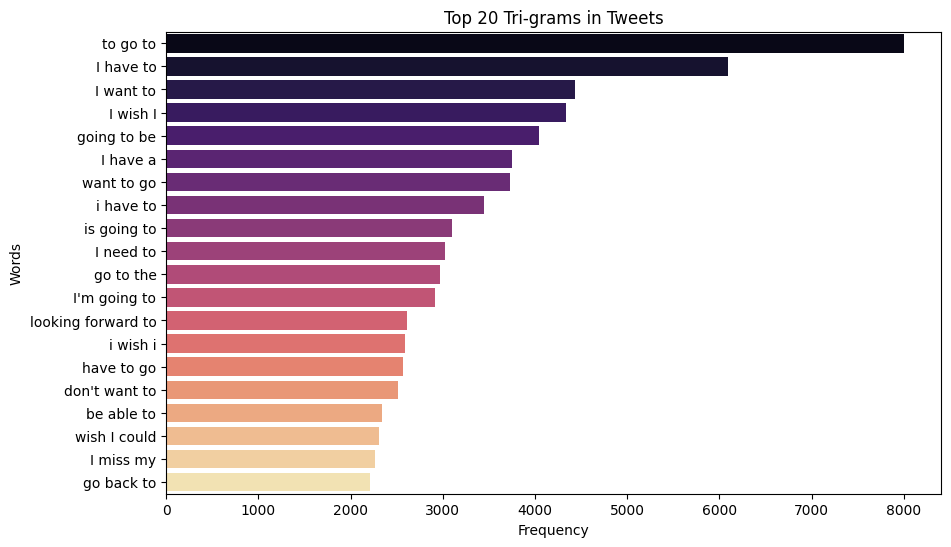

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from itertools import chain
from builtins import zip

# Create a copy of the existing dataframe for EDA to avoid modifying df
df_eda = df.copy()

# **1. Class Distribution Visualization**
plt.figure(figsize=(10, 6))
sns.countplot(x=df_eda['polarity'], palette="viridis")
plt.title("Class Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()

# **2. Text Length Distribution**
df_eda["text_length"] = df_eda["text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_eda["text_length"], bins=50, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# **3. Word Cloud for Positive & Negative Tweets**
stop_words = set(stopwords.words('english'))

# Function to generate word cloud
def generate_wordcloud(text, title):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(' '.join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=14)
    plt.axis("off")
    plt.show()

# Generate word clouds
generate_wordcloud(df_eda[df_eda['polarity'] == 1]['text'], "Most Common Words in Positive Tweets")
generate_wordcloud(df_eda[df_eda['polarity'] == 0]['text'], "Most Common Words in Negative Tweets")

# **4. Most Frequent Words**
def get_top_n_words(text, n=20):
    words = list(chain(*text.str.split()))
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(n)

# Plot top words for both classes
top_words_positive = get_top_n_words(df_eda[df_eda['polarity'] == 1]['text'])
top_words_negative = get_top_n_words(df_eda[df_eda['polarity'] == 0]['text'])

def plot_top_words(word_freq, title):
    words, counts = list(zip(*word_freq))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="magma")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(top_words_positive, "Top 20 Words in Positive Tweets")
plot_top_words(top_words_negative, "Top 20 Words in Negative Tweets")

# **5. Bi-gram & Tri-gram Analysis**
def get_top_ngrams(text, n=2, top_n=20):
    ngram_list = list(chain(*[list(ngrams(tweet.split(), n)) for tweet in text]))
    ngram_counts = Counter(ngram_list).most_common(top_n)
    return [(" ".join(ngram), count) for ngram, count in ngram_counts]

# Get top n-grams
top_bigrams = get_top_ngrams(df_eda['text'], n=2)
top_trigrams = get_top_ngrams(df_eda['text'], n=3)

# Plot top bi-grams and tri-grams
plot_top_words(top_bigrams, "Top 20 Bi-grams in Tweets")
plot_top_words(top_trigrams, "Top 20 Tri-grams in Tweets")


# **Step 4 : Vectorization**

In [13]:
from sklearn.model_selection import train_test_split

X = df['stemmed_text']
y = df['polarity']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify= y, random_state=42)

print(X.shape, X_train_text.shape, X_test_text.shape)

(1048572,) (838857,) (209715,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print(f"Training Data:\n {X_train}")
print(f"Testing Data:\n {X_test}")

Training Data:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4868945 stored elements and shape (838857, 5000)>
  Coords	Values
  (0, 2984)	0.42485997843482426
  (0, 2470)	0.4806756562106795
  (0, 98)	0.34821227544655015
  (0, 71)	0.4316963231408373
  (0, 1477)	0.3748649852405738
  (0, 4115)	0.37457662888439186
  (1, 1338)	0.31641556380929337
  (1, 4265)	0.22610291257343587
  (1, 4513)	0.2186284498348049
  (1, 1437)	0.24026946507348107
  (1, 3315)	0.31481744873815887
  (1, 4547)	0.3256244127790087
  (1, 3758)	0.36869632385652173
  (1, 3662)	0.23014024270013064
  (1, 4263)	0.2955392665332606
  (1, 1128)	0.28631923653877894
  (1, 4515)	0.42410599022291234
  (2, 98)	0.24409918737550687
  (2, 2643)	0.19664763499350088
  (2, 1348)	0.18102997481536004
  (2, 1590)	0.17346006673817474
  (2, 1049)	0.23582274609570172
  (2, 362)	0.3144731292802515
  (2, 2573)	0.2025511139092932
  (2, 1680)	0.22038614595469735
  :	:
  (838853, 4790)	0.366812784237159
  (838853, 1863)	0.51712850487

# **Step 5 : Applying Models**

**1. Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train_logistic = log_reg.predict(X_train)
accuracy_train_logistic = accuracy_score(y_train, y_pred_train_logistic)
print(f"Logistic Regression Training accuracy : {accuracy_train_logistic}")

y_pred_test_logistic = log_reg.predict(X_test)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)
print(f"Logistic Regression Testing accuracy : {accuracy_test_logistic}")

Logistic Regression Training accuracy : 0.8285416942339398
Logistic Regression Testing accuracy : 0.8262356054645591


**2. Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train_linear = lin_reg.predict(X_train)
r2_train_linear = r2_score(y_train, y_pred_train_linear)
print(f"\n Linear Regression Training accuracy : {r2_train_linear}")

y_pred_test_linear = lin_reg.predict(X_test)
r2_test_linear = r2_score(y_test, y_pred_test_linear)
print(f"linear Regression Testing accuracy : {r2_test_linear}")


 Linear Regression Training accuracy : 0.2904261405108557
linear Regression Testing accuracy : 0.28395440264229066


**3. Naive Bayes**

In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.8083398898505114


**4. XG Boost**

In [18]:
from xgboost import XGBClassifier

print("Training XGBoost...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:16:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8045347256991632
